In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tv_df = pd.read_csv('TV_shows_clean_final.csv')
movies_df = pd.read_csv('Movies_clean_final.csv')

In [3]:
#descriptive statistics

print('Movies mean and median for release year')
print(movies_df.groupby('streaming_platform')['release_year'].mean())
print(movies_df.groupby('streaming_platform')['release_year'].median())
print('movies mean and median for duration')
print(movies_df.groupby('streaming_platform')['duration_minutes'].mean())
print(movies_df.groupby('streaming_platform')['duration_minutes'].median())


print('TV Shows mean and median for release year')
print(tv_df.groupby('streaming_platform')['release_year'].mean())
print(tv_df.groupby('streaming_platform')['release_year'].median())

print('TV Shows mean and median for duration in seasons')
print(tv_df.groupby('streaming_platform')['duration_seasons'].mean())
print(tv_df.groupby('streaming_platform')['duration_seasons'].median())

Movies mean and median for release year
streaming_platform
Amazon Prime    2005.868333
DisneyPlus      2002.724656
Hulu            2010.883562
Netflix         2013.500617
Name: release_year, dtype: float64
streaming_platform
Amazon Prime    2015.0
DisneyPlus      2007.0
Hulu            2016.0
Netflix         2016.0
Name: release_year, dtype: float64
movies mean and median for duration
streaming_platform
Amazon Prime    92.819091
DisneyPlus      88.647059
Hulu            99.881962
Netflix         98.776643
Name: duration_minutes, dtype: float64
streaming_platform
Amazon Prime    92.0
DisneyPlus      91.0
Hulu            97.0
Netflix         98.0
Name: duration_minutes, dtype: float64
TV Shows mean and median for release year
streaming_platform
Amazon Prime    2014.747463
DisneyPlus      2013.257576
Hulu            2011.712246
Netflix         2016.607183
Name: release_year, dtype: float64
streaming_platform
Amazon Prime    2018.0
DisneyPlus      2017.0
Hulu            2014.0
Netflix     

In [4]:
import statsmodels.api as sm

In [5]:
x = movies_df['release_year']
y = movies_df['duration_minutes']
x = sm.add_constant(x)

# Fit the regression model
model = sm.OLS(y, x).fit()

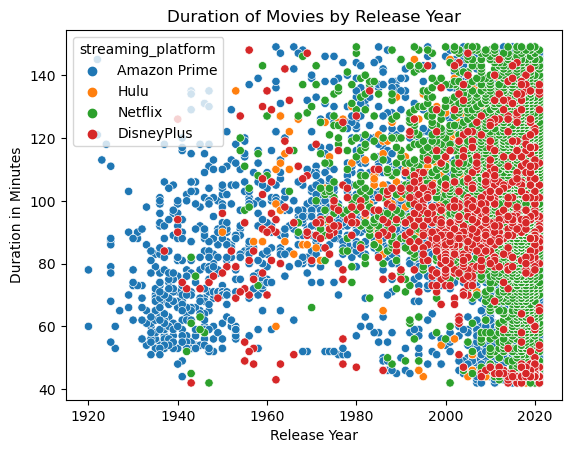

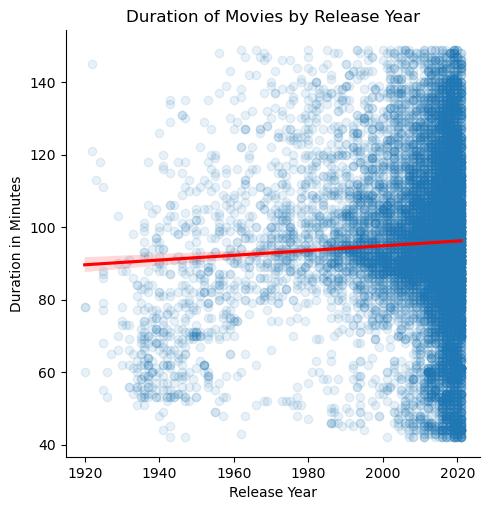

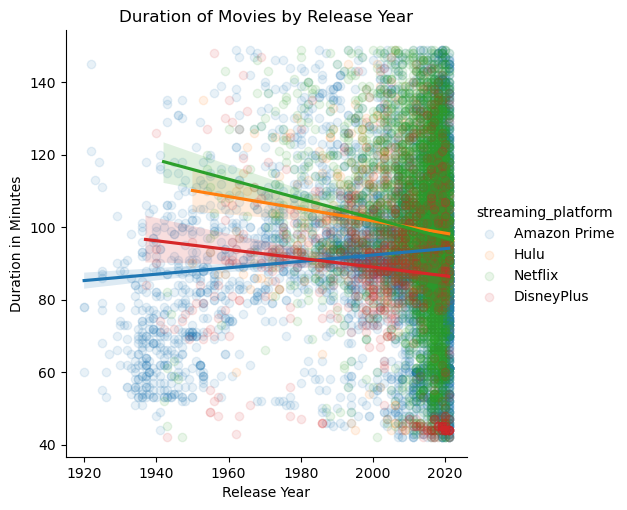

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       duration_minutes   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     36.07
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           1.95e-09
Time:                        11:00:15   Log-Likelihood:                -62840.
No. Observations:               13952   AIC:                         1.257e+05
Df Residuals:                   13950   BIC:                         1.257e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -36.2700     21.933     -1.654      0.098     -79.261       6.721
release_year     0.0656      0.011      6.006      0.000       0.044       0.087
==============================================================================
Omnibus:                       13.478   Durbin-Watson:                   1.049
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.512
Skew:                          -0.071   Prob(JB):                      0.00116
Kurtosis:                       3.058   Cond. No.                     2.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
plt.subplot()

sns.scatterplot(data=movies_df, x='release_year', y = 'duration_minutes', hue = 'streaming_platform')

plt.xlabel('Release Year')
plt.ylabel('Duration in Minutes')
plt.title('Duration of Movies by Release Year')


plt.subplot()
sns.lmplot(x='release_year',y= 'duration_minutes', data=movies_df, line_kws={'color': 'red'}, scatter_kws = {'alpha' : 0.1})
plt.xlabel('Release Year')
plt.ylabel('Duration in Minutes')
plt.title('Duration of Movies by Release Year')

plt.subplot()
#checking differents for each streaming platform compared to the total dataset
sns.lmplot(x='release_year',y= 'duration_minutes', data=movies_df, hue= 'streaming_platform',scatter_kws = {'alpha' : 0.1})
plt.xlabel('Release Year')
plt.ylabel('Duration in Minutes')
plt.title('Duration of Movies by Release Year')


plt.show()
model.summary()

looking at the graphs and model summary we can see that duration or length of movies is slightly increasing the coefficent of the linear regression line is .0935 which considering the movies are generally 50-200 minutes long is a small increase.potential factors in this maybe the large increase in blockbuster movie lengths but an increase in the general amount of movies to decrease that slope of that line. 

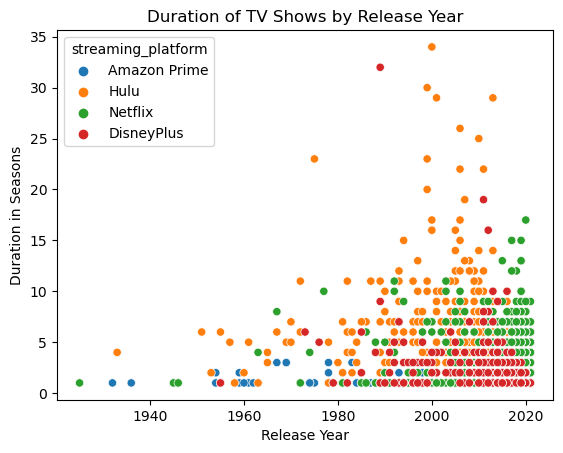

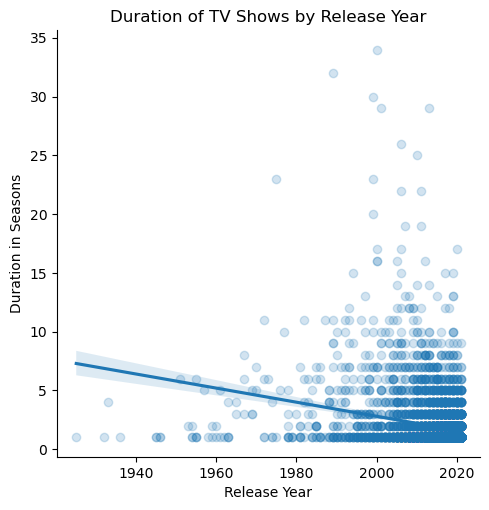

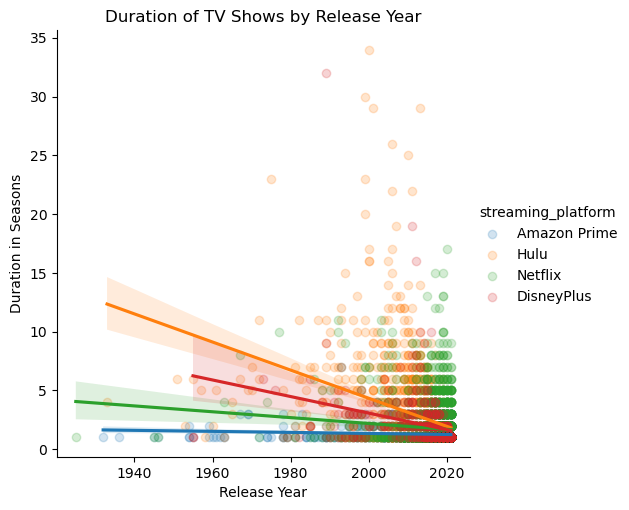

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       duration_seasons   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     357.8
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           1.37e-77
Time:                        11:00:16   Log-Likelihood:                -12965.
No. Observations:                6075   AIC:                         2.593e+04
Df Residuals:                    6073   BIC:                         2.595e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          122.5483      6.378     19.215      0.000     110.046     135.051
release_year    -0.0599      0.003    -18.917      0.000      -0.066      -0.054
==============================================================================
Omnibus:                     6478.147   Durbin-Watson:                   1.246
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           631008.029
Skew:                           5.273   Prob(JB):                         0.00
Kurtosis:                      51.802   Cond. No.                     4.90e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
#general look at the data for release v duration of show
plt.subplot()
sns.scatterplot(data=tv_df, x='release_year', y = 'duration_seasons', hue = 'streaming_platform')

plt.xlabel('Release Year')
plt.ylabel('Duration in Seasons')
plt.title('Duration of TV Shows by Release Year')

#looking at the general linear regression for duration by release year
plt.subplot()
sns.lmplot(x='release_year',y= 'duration_seasons', data=tv_df, scatter_kws = {'alpha' : 0.2})
plt.xlabel('Release Year')
plt.ylabel('Duration in Seasons')
plt.title('Duration of TV Shows by Release Year')


#checking differents for each streaming platform compared to the total dataset
plt.subplot()
sns.lmplot(x='release_year',y= 'duration_seasons', data=tv_df, scatter_kws = {'alpha' : 0.2}, hue = 'streaming_platform')
plt.xlabel('Release Year')
plt.ylabel('Duration in Seasons')
plt.title('Duration of TV Shows by Release Year')
plt.show()

x = tv_df['release_year']
y = tv_df['duration_seasons']
x = sm.add_constant(x)

# Fit the regression model
model = sm.OLS(y, x).fit()
model.summary()

Looking at the graphs and model summary we can see that there is a negative regression (with a coefficent of -.06) as release year increases. This means as time goes on the amount of seasons a show is given is decreasing meaning shorter shows. One potential factor affecting this cause be the growth in streaming platforms  and the amount of shows being created. This would make this duration decrease for multiple reasons including people moving onto new projects,or bad projects getting funded easily and not succeeding and getting cancelled after one season.